In [1]:
import sys
import gym
import numpy as np
from collections import defaultdict, deque
import matplotlib.pyplot as plt
%matplotlib inline
import random
import check_test
from plot_utils import plot_values

In [2]:
#create an instance of CliffWalking environment
env = gym.make('CliffWalking-v0')

In [3]:
print("Actions_space: {0}".format(env.action_space))
print("State Space: {0}".format(env.observation_space))
print("Action Space (env.action_space.n) {0}: ".format(env.action_space.n))

Actions_space: Discrete(4)
State Space: Discrete(48)
Action Space (env.action_space.n) 4: 


In [4]:
#define the epsilon greedy strategy to select the action
def epsilon_greedy(Q, state, nA, eps):
    if random.random() > eps:
        #select the action based on the greedy strategy. Return the index of the max element
        return np.argmax(Q[state])
    else:
        # randomly choose the action 
        return random.choice(np.arange(env.action_space.n))
    

def update_QTable_using_SARSA( alpha, gamma, Q, state, action, reward, next_state=None, next_action=None):
    current_state_reward = Q[state][action]
    if next_state is not None: 
        next_reward = Q[next_state][next_action]
    else: 
        next_reward = 0 
    
    target = reward + gamma * next_reward
    
    new_reward = current_state_reward + alpha * (target - current_state_reward)
    return new_reward
    
    


In [5]:
    
def sarsa(env, num_episodes, alpha, gamma=1.0, plot_every=100):

    nA = env.action_space.n
    #define the QTable 
    Q = defaultdict(lambda: np.zeros(nA))
    
    #define queues to hold the tmp_scores and avg_scores across all episiodes
    tmp_scores = deque(maxlen=plot_every)
    avg_scores = deque(maxlen=num_episodes)
    
    for i_episode in range(1, num_episodes+1):
        #monitor progress
        if i_episode % 100 == 0:
            print("\rEpisode {}/{}".format(i_episode, num_episodes), end="")
            sys.stdout.flush() 
        
        score = 0    
        state = env.reset()
        
        eps = 1.0 / i_episode 
        action = epsilon_greedy(Q, state, nA, eps)

        
        while True:
            
            next_state, reward, done ,info = env.step(action)
            score += reward
            
            if not done: 
        
                next_action = epsilon_greedy(Q, next_state, nA, eps) # epsilon-greedy action
                Q[state][action] =  update_QTable_using_SARSA(alpha, gamma, Q, \
                                                  state, action, reward, next_state, next_action)
                
                state = next_state
                action = next_action
            else: 

                Q[state][action] =  update_QTable_using_SARSA(alpha, gamma, Q, \
                                                  state, action, reward)
                tmp_scores.append(score)    # append score
                break
        if i_episode % plot_every == 0 :
            #avg the 100 scores and append to the final queue
            avg_scores.append(np.mean(tmp_scores))
        
        
    #plot the performance over the episode 
    plt.plot(np.linspace(0,num_episodes,len(avg_scores),endpoint=False), np.asarray(avg_scores))
    plt.xlabel("Number of Episodes")
    plt.ylabel('Average Reward (Over Next %d Episodes)' % plot_every)
    plt.show()
    
    # print best 100-episode performance
    print(('Best Average Reward over %d Episodes: ' % plot_every), np.max(avg_scores))  
    return Q
            

Episode 5000/5000

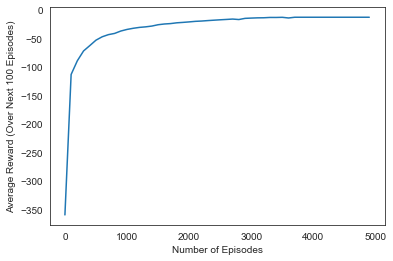

Best Average Reward over 100 Episodes:  -13.0


**<span style="color: green;">PASSED</span>**


Estimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):
[[ 1  0  1  1  1  1  3  1  3  3  1  2]
 [ 1  0  1  0  1  1  2  1  1  2  2  2]
 [ 1  1  1  1  1  1  1  1  1  1  1  2]
 [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]]


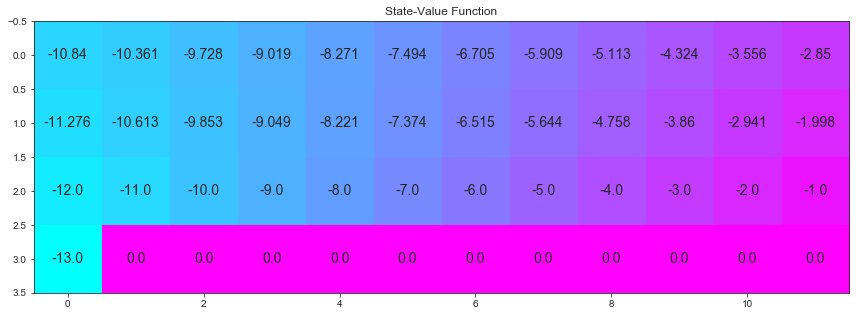

In [6]:

# obtain the estimated optimal policy and corresponding action-value function
Q_sarsa = sarsa(env, 5000, .01)
# print the estimated optimal policy
policy_sarsa = np.array([np.argmax(Q_sarsa[key]) if key in Q_sarsa else -1 for key in np.arange(48)]).reshape(4,12)
check_test.run_check('td_control_check', policy_sarsa)
print("\nEstimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):")
print(policy_sarsa)

# plot the estimated optimal state-value function
V_sarsa = ([np.max(Q_sarsa[key]) if key in Q_sarsa else 0 for key in np.arange(48)])
plot_values(V_sarsa)